### Use case
It is not always obvious for hosts to think of every details regarding family living with children, old people and disabled prior to list their homes our appartments. In this notebook, i will try to answer the question: what basic amenities and information are taken into account regarding families living with children, old people and/or disabled who want to do a visit in Berlin using Airbnb?
The basic amenities for a family containing children is to make sure the place is very clean and the host is experienced on the market which will help develop a good reflex to any unexpected event. If there is old people and disabled, the would have elevator if several floors and wheelchair available.

In [579]:
#import packages to work with
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set()

In [580]:
# load the listings file
listings = pd.read_csv('listings.csv')
listings.neighbourhood_group.unique()

array(['Mitte', 'Pankow', 'Tempelhof - Schöneberg',
       'Friedrichshain-Kreuzberg', 'Neukölln', 'Charlottenburg-Wilm.',
       'Treptow - Köpenick', 'Steglitz - Zehlendorf', 'Reinickendorf',
       'Lichtenberg', 'Marzahn - Hellersdorf', 'Spandau'], dtype=object)

In [581]:
#select only the columns that are relevant to the analysis wanted
listings_cols = ['id','room_type','price','neighbourhood_group']
listings = listings[listings_cols]
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   22552 non-null  int64 
 1   room_type            22552 non-null  object
 2   price                22552 non-null  int64 
 3   neighbourhood_group  22552 non-null  object
dtypes: int64(2), object(2)
memory usage: 704.9+ KB


In [582]:
# load the listings_summary file
listings_summary = pd.read_csv('listings_summary.csv')

In [583]:
#select only the columns that are relevant to the analysis wanted
listings_summary_cols = ['id','host_since',
                         'host_identity_verified',
                         'amenities', 'guests_included',
                         'bed_type',
                         'review_scores_rating',
                         'review_scores_cleanliness']
listings_summary = listings_summary[listings_summary_cols]

In [584]:
listings_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         22552 non-null  int64  
 1   host_since                 22526 non-null  object 
 2   host_identity_verified     22526 non-null  object 
 3   amenities                  22552 non-null  object 
 4   guests_included            22552 non-null  int64  
 5   bed_type                   22552 non-null  object 
 6   review_scores_rating       18163 non-null  float64
 7   review_scores_cleanliness  18141 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.4+ MB


In [585]:
#Merge listings and listings_summary to get the final DF for analysis
listings_combo = pd.merge(listings, listings_summary, on='id')

In [586]:
listings_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 0 to 22551
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         22552 non-null  int64  
 1   room_type                  22552 non-null  object 
 2   price                      22552 non-null  int64  
 3   neighbourhood_group        22552 non-null  object 
 4   host_since                 22526 non-null  object 
 5   host_identity_verified     22526 non-null  object 
 6   amenities                  22552 non-null  object 
 7   guests_included            22552 non-null  int64  
 8   bed_type                   22552 non-null  object 
 9   review_scores_rating       18163 non-null  float64
 10  review_scores_cleanliness  18141 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 2.1+ MB


In [587]:
#type conversions
listings_combo['price'] = listings_combo['price'].astype(float)
listings_combo['host_since'] = pd.to_datetime(listings_combo['host_since'])

In [588]:
#analytic summary of neighbourhood_group
listings_combo.neighbourhood_group.describe()

count                        22552
unique                          12
top       Friedrichshain-Kreuzberg
freq                          5497
Name: neighbourhood_group, dtype: object

In [589]:
listings_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 0 to 22551
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         22552 non-null  int64         
 1   room_type                  22552 non-null  object        
 2   price                      22552 non-null  float64       
 3   neighbourhood_group        22552 non-null  object        
 4   host_since                 22526 non-null  datetime64[ns]
 5   host_identity_verified     22526 non-null  object        
 6   amenities                  22552 non-null  object        
 7   guests_included            22552 non-null  int64         
 8   bed_type                   22552 non-null  object        
 9   review_scores_rating       18163 non-null  float64       
 10  review_scores_cleanliness  18141 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage:

In [590]:
#from amenities, get all listing with comply more with family
def wheelchair(value):
    if 'wheelchair' in value.lower():
        return True
    else:
        return False
listings_combo['wheelchair'] = listings_combo['amenities'].apply(wheelchair)

In [591]:
#from amenities, get all listing with comply more with family
def family(value):
    if 'family' in value.lower():
        return True
    else:
        return False
listings_combo['family'] = listings_combo['amenities'].apply(family)

In [592]:
#from amenities, get all listing with comply more with family
def elevator(value):
    if 'elevator' in value.lower():
        return True
    else:
        return False
listings_combo['elevator'] = listings_combo['amenities'].apply(elevator)

In [593]:
#from amenities, get all listing with comply more with family
def verification(value):
    if value == 't':
        return True
    else:
        return False
listings_combo['host_identity_verified'] = listings_combo['host_identity_verified'].apply(verification)

In [594]:
#drop amenities column after extraacting the information wanted
listings_combo.drop('amenities', axis=1, inplace=True)

In [595]:
#replace NaNs from review_scores_rating with and review_scores_cleanliness with 0.0 which means they are not scored
listings_combo.review_scores_rating.fillna(0.0, inplace=True)
listings_combo.review_scores_cleanliness.fillna(0.0, inplace=True)

In [596]:
#filling NaNs containing in host_since column using foward fill method
listings_combo.host_since.fillna(method='ffill', inplace=True)

In [597]:
#view the first 5 rows of combined DF
listings_combo.head()

,id,room_type,price,neighbourhood_group,host_since,host_identity_verified,guests_included,bed_type,review_scores_rating,review_scores_cleanliness,wheelchair,family,elevator
0,2015,Entire home/apt,60.0,Mitte,2008-08-18,True,1,Real Bed,93.0,9.0,False,True,False
1,2695,Private room,17.0,Pankow,2008-09-16,True,1,Real Bed,100.0,10.0,False,False,True
2,3176,Entire home/apt,90.0,Pankow,2008-10-19,True,2,Real Bed,92.0,9.0,False,True,False
3,3309,Private room,26.0,Tempelhof - Schöneberg,2008-11-07,True,1,Pull-out Sofa,88.0,9.0,False,False,False
4,7071,Private room,42.0,Pankow,2009-05-16,True,1,Real Bed,96.0,10.0,False,True,False


In [598]:
listings_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 0 to 22551
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         22552 non-null  int64         
 1   room_type                  22552 non-null  object        
 2   price                      22552 non-null  float64       
 3   neighbourhood_group        22552 non-null  object        
 4   host_since                 22552 non-null  datetime64[ns]
 5   host_identity_verified     22552 non-null  bool          
 6   guests_included            22552 non-null  int64         
 7   bed_type                   22552 non-null  object        
 8   review_scores_rating       22552 non-null  float64       
 9   review_scores_cleanliness  22552 non-null  float64       
 10  wheelchair                 22552 non-null  bool          
 11  family                     22552 non-null  bool          
 12  elev

In [599]:
#get all listings that are ready to host families per neighbourhood group 
family = listings_combo.family == True
family_listings = listings_combo[family].groupby('neighbourhood_group')['family'].agg('count')

In [600]:
#visualize the average price for listings per neighbourhood group
mean_price = listings_combo.groupby('neighbourhood_group')['price'].agg('mean')
mean_price.sort_values()

neighbourhood_group
Neukölln                     46.567305
Reinickendorf                48.263158
Treptow - Köpenick           52.216807
Lichtenberg                  56.113372
Steglitz - Zehlendorf        56.327231
Marzahn - Hellersdorf        56.503546
Spandau                      58.233871
Friedrichshain-Kreuzberg     60.828816
Pankow                       67.822649
Mitte                        69.699417
Tempelhof - Schöneberg       96.572436
Charlottenburg-Wilm.        114.270729
Name: price, dtype: float64

In [601]:
#get the mean price for listings per neighbourhood group containing an elevator
elevator = listings_combo.elevator == True
elev_per_neighgroup = listings_combo[elevator].groupby('neighbourhood_group')['elevator'].agg('count')

In [602]:
#get the number of listings offering wheelchair for disabled
wheelchair = listings_combo.wheelchair == True
wheelchair_listings =listings_combo[wheelchair].groupby('neighbourhood_group')['wheelchair'].agg('count')

In [603]:
#Get the number of verified hosts per neighbourhood group, this is an important security criteria
verification = listings_combo.host_identity_verified == True
verified_hosts =listings_combo[verification].groupby('neighbourhood_group')['host_identity_verified']\
                                                .agg('count')

Text(0, 0.5, 'Count | Average price($)')

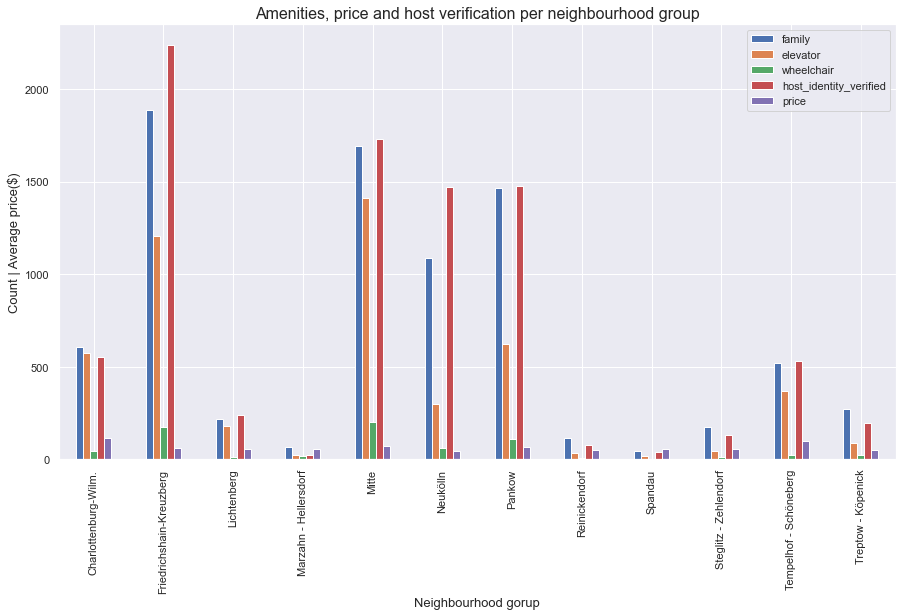

In [621]:
#concatenate all the series and visualize the data
fig, ax = plt.subplots(figsize=(15,8))
concat_df = pd.concat([family_listings,elev_per_neighgroup,wheelchair_listings,verified_hosts,mean_price], axis=1)
concat_df.plot(kind='bar', ax=ax)
plt.xticks(rotation=90)
plt.title('Amenities, price and host verification per neighbourhood group', fontsize=16)
plt.xlabel('Neighbourhood gorup', fontsize=13)
plt.ylabel('Count | Average price($)', fontsize=13)

Text(0.5, 1.0, 'Correlation between amenities, host verification and price')

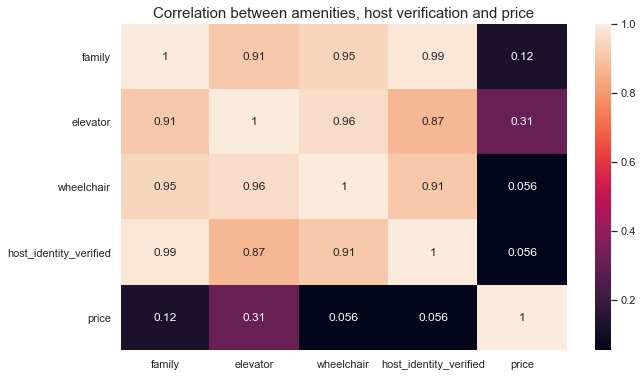

In [617]:
#see the correlation between data from the concatenated series (especially the price vs amenities offered)
fig, ax = plt.subplots(figsize=(10,6))
sb.heatmap(concat_df.corr(), annot=True)
plt.title('Correlation between amenities, host verification and price', fontsize=15)

#### since we are looking to host family containing children, we put the emphasis on ratings and cleanliness because children are fragile. The focus is not only best prices but also good ratings and cleanliness.

Text(0, 0.5, 'Neighbourhood group')

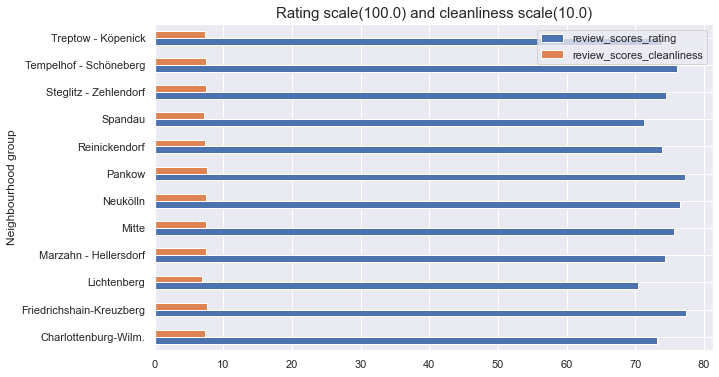

In [613]:
#visualize the ratings and cleanliness per neighbourhood group
mean_ratings = listings_combo.groupby('neighbourhood_group')['review_scores_rating'].agg('mean')
mean_cleanliness = listings_combo.groupby('neighbourhood_group')['review_scores_cleanliness'].agg('mean')

ratings_cleanliness = pd.concat([mean_ratings,mean_cleanliness], axis=1)

fig, ax = plt.subplots(figsize=(10,6))
ratings_cleanliness.plot(kind='barh', ax=ax)
plt.title('Rating scale(100.0) and cleanliness scale(10.0)', fontsize=15)
plt.ylabel('Neighbourhood group')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Neighbourhood group')

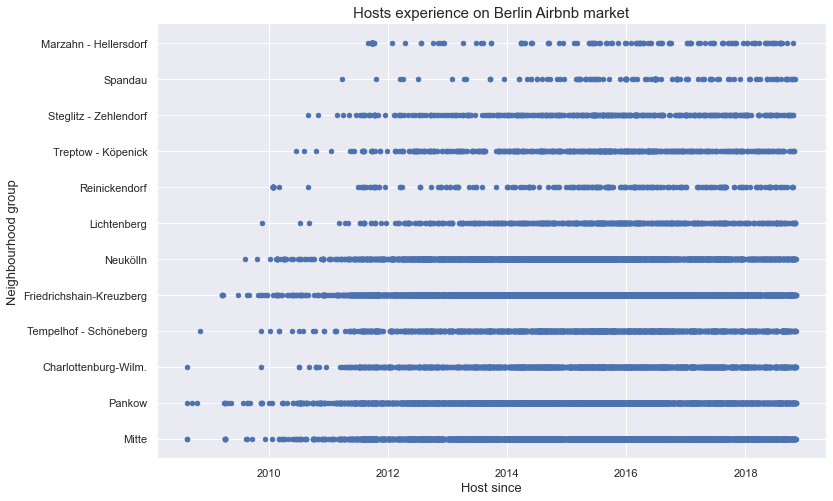

In [616]:
#get a quick view of the the neighbourhood groups that are more ancient on the market, this might help build trust
# based on the experience on hosting customers
fig, ax = plt.subplots(figsize=(12,8))
listings_combo[['neighbourhood_group','host_since']].sort_values(by=['host_since'], ascending=True)\
.plot(kind='scatter', y='neighbourhood_group', x='host_since', ax=ax)
plt.title('Hosts experience on Berlin Airbnb market', fontsize=15)
plt.xlabel('Host since', fontsize=13)
plt.ylabel('Neighbourhood group', fontsize=13)